## ESMA 3016
## Lab9: Regresion y Correlacion Lineal
### Edgar Acuna
#### Septiembre 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as sm
%matplotlib inline

In [2]:
ventas=[9,12,16,19,23,27,34,37,40,45]
years=[3,4,6,7,8,12,15,20,22,26]

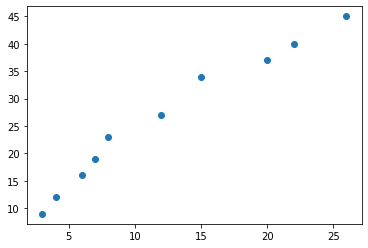

In [3]:
#Haciendo el scatterplot
plt.scatter(years,ventas)

In [4]:
#Hallando la correlacion
np.corrcoef(years,ventas)[0][1]

0.9835928893659417

In [5]:
#Leyendo el archivo de datos corrs directamente desde la internet
cor1=pd.read_csv("http://academic.uprm.edu/eacuna/corrs.dat",sep="\s+")
cor1.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,4,8,4,48,4,38,4,48
1,5,12,5,43,5,25,5,32
2,8,15,7,37,8,35,8,25
3,16,27,12,28,12,29,12,17
4,17,33,14,21,17,33,15,23


In [6]:
#Hallando las correlaciones usando pandas
co1=cor1.corr()['x1']['y1']
print("El coeficiente de correlacion entre X1 y Y1 es=", co1)
co2=cor1.corr()['x2']['y2']
print("El coeficiente de correlacion entre X2 y Y2 es=",co2)
co3=cor1.corr()["x3"]["y3"]
print("El coeficiente de correlacion entre X3 y Y3 es=",co3)
co4=cor1.corr()["x4"]["y4"]
print("el coeficiente de correlacion entre X4 y Y4 es=", co4)

El coeficiente de correlacion entre X1 y Y1 es= 0.988212065059534
El coeficiente de correlacion entre X2 y Y2 es= -0.992433402715553
El coeficiente de correlacion entre X3 y Y3 es= 0.1918258949595663
el coeficiente de correlacion entre X4 y Y4 es= 0.11212638967994151


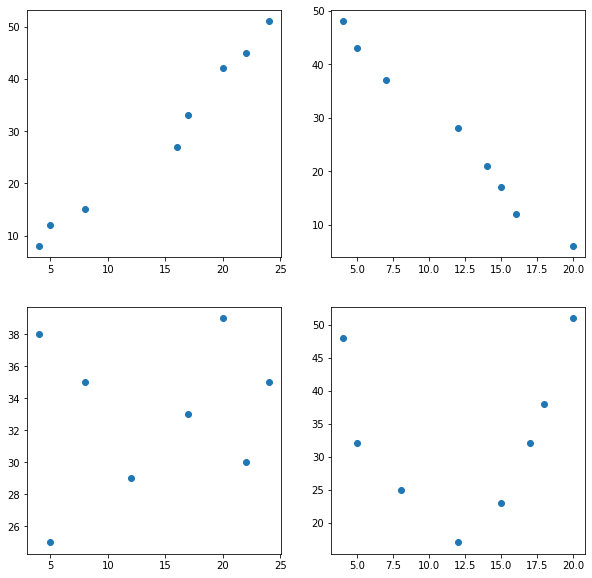

In [7]:
#Ploteando los scatter plots
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)
ax1.scatter(cor1['x1'],cor1['y1'])

ax2 = fig.add_subplot(222)
ax2.scatter(cor1['x2'],cor1['y2'])
ax3 = fig.add_subplot(223)
ax3.scatter(cor1['x3'],cor1['y3'])

ax4 = fig.add_subplot(224)
ax4.scatter(cor1['x4'],cor1['y4'])

plt.show()

In [8]:
#Leyendo el archvo de datos corrout
cor2=pd.read_csv("http://academic.uprm.edu/eacuna/corrout.dat",sep="\s+")
cor2.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,4,8,4,18,4,8,4,8
1,5,13,5,13,5,12,5,12
2,7,22,7,12,8,15,8,95
3,9,28,9,8,12,20,12,12
4,12,32,12,18,56,27,16,27


In [9]:
#Hallando las correlaciones usando pandas
co1=cor2.corr()['x1']['y1']
print("El coeficiente de correlacion entre X1 y Y1 es=", co1)
co2=cor2.corr()['x2']['y2']
print("El coeficiente de correlacion entre X2 y Y2 es=",co2)
co3=cor2.corr()["x3"]["y3"]
print("El coeficiente de correlacion entre X3 y Y3 es=",co3)
co4=cor2.corr()["x4"]["y4"]
print("el coeficiente de correlacion entre X4 y Y4 es=", co4)

El coeficiente de correlacion entre X1 y Y1 es= 0.9842719593039495
El coeficiente de correlacion entre X2 y Y2 es= 0.9953336045451944
El coeficiente de correlacion entre X3 y Y3 es= 0.43620586632446895
el coeficiente de correlacion entre X4 y Y4 es= 0.26423706225157234


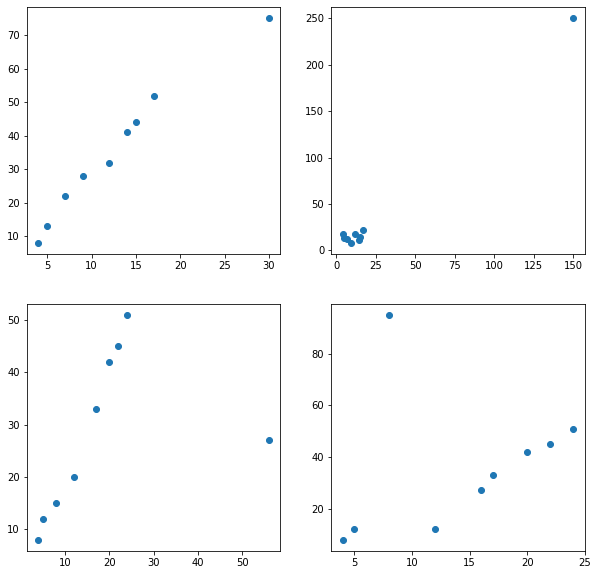

In [10]:
#Ploteando los scatter plots
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)
ax1.scatter(cor2['x1'],cor2['y1'])

ax2 = fig.add_subplot(222)
ax2.scatter(cor2['x2'],cor2['y2'])
ax3 = fig.add_subplot(223)
ax3.scatter(cor2['x3'],cor2['y3'])

ax4 = fig.add_subplot(224)
ax4.scatter(cor2['x4'],cor2['y4'])

plt.show()

In [11]:
 #Hallando los coeficentes de la linea de regresion
b, a=np.poly1d(np.polyfit(years, ventas, 1))
print("El slope es:", b, "El intercepto es:", a)

El slope es: 1.5072021691238777 El intercepto es: 7.661413319776308


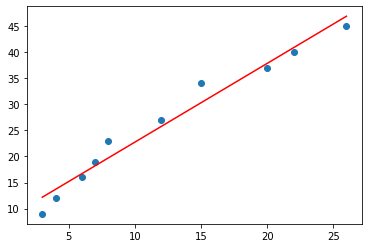

In [12]:
#Trazando la linea de regresion sobre el plot de puntos
x=years
y=ventas
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),color='red')

plt.show()

In [13]:
#Preprando el dataframe para usar pandas
data=[years,ventas]
data=np.transpose(data)
df1=pd.DataFrame(data,columns=['years','ventas'])
df1

,years,ventas
0,3,9
1,4,12
2,6,16
3,7,19
4,8,23
5,12,27
6,15,34
7,20,37
8,22,40
9,26,45


In [14]:
#usando pandas para hallar la correlacion
df1.corr()["years"]["ventas"]

0.9835928893659418

In [15]:
#usando stats de scipy muestra la correlacion y su p-value
stats.pearsonr(years,ventas)

(0.9835928893659419, 3.108350979394446e-07)

In [16]:
import statsmodels.formula.api as sm
result1 = sm.ols(formula="ventas ~ years", data=df1).fit()
print(result1.params)

Intercept    7.661413
years        1.507202
dtype: float64


In [17]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1reg.txt",delim_whitespace=True)
df.corr()["CEEB"]["GPA"]

0.3480352973395258

In [18]:
result = sm.ols(formula="GPA ~ CEEB", data=df).fit()
print(result.params)

Intercept    2.209878
CEEB         0.001087
dtype: float64


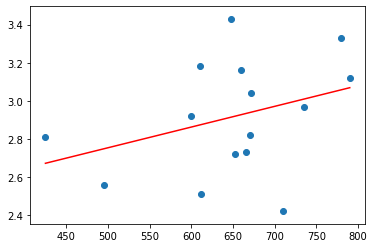

In [19]:
x=df['CEEB']
y=df['GPA']
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),color='red')

plt.show()

In [20]:
#Hallando el coeficiente de determinacion r2
r2 = sm.ols(formula="GPA ~ CEEB", data=df).fit().rsquared
print (r2)

0.12112856819421214


In [21]:
#Hallando el coeficiente de determinacion r2
r2 = result1.rsquared
print (r2)

0.9674549720112416


In [22]:
pred1=result1.predict(pd.DataFrame({'years': [25]}))
print (pred1)

0    45.341468
dtype: float64


Comentario:El coeficiente de determinacionr2 es del 12% muy bajo. las prediciones basadas en el modelo no son confiables

In [23]:
#Prediciendo el GPA de dos estudiantes uno que saco 490 y otro 790 en mate del CEEB
pred=result.predict(pd.DataFrame({'CEEB': [600,800]}))
print (pred)

0    2.862192
1    3.079629
dtype: float64
